# K-Means Clustering for Image Segementation
Ryan Miller

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

## Importing the Image

In [2]:
fish = Image.open('Images/fish.jpg')
fish_data = pd.DataFrame(list(fish.getdata()),columns=['R','G','B'])
fish_data.head()

,R,G,B
0,151,191,105
1,150,190,104
2,149,189,103
3,149,187,102
4,148,186,99


In [3]:
print("Number of Pixels:", fish_data.shape[0])

Number of Pixels: 307200


## K-Means Algorithm

In [4]:
class KMeans(object):
    #list of WCSS values
    wcss_ = []
    
    #randomly initializing k cluster centers
    def init_centers(self, X, k):
        idxs = np.random.randint(low=0,high=X.shape[0],size=k)
        return X[idxs,:]
    
    #computing the squared distance from each point to all of the cluster centers
    def compute_d2(self, X, centers):
        m = len(X)
        k = len(centers)
        S = np.empty((m, k))
        for j in range(k):
            S[:,j] = np.linalg.norm(X - centers[j], axis=1)**2
        return S
    
    #assigning cluster labels based on distance matrix
    def assign_cluster_labels(self, S):   
        return np.argmin(S,axis=1)
    
    #updating cluster centers based on assignments
    def update_centers(self, X, y):
        m, d = X.shape
        k = max(y) + 1
        centers = np.empty((k, d))
        for j in range(k):
            centers[j,:] = np.mean(X[y == j],axis=0)
        return centers

    #finding the within-cluster sum of squares
    def WCSS(self, S):
        return np.sum(np.amin(S,axis=1))
    
    #checking for convergence
    def has_converged(self, old_centers, centers):
        return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])
    
    #learning the clusters
    def cluster(self, X, k,starting_centers=None,max_steps=100):
        if starting_centers is None:
            centers = self.init_centers(X, k)
        else:
            centers = starting_centers
        converged = False
        labels = np.zeros(len(X))
        for i in tqdm(range(max_steps)):
            if converged == True:
                labels = self.assign_cluster_labels(S)
                return labels
            old_centers = centers
            S = self.compute_d2(X=X,centers=old_centers)
            y = self.assign_cluster_labels(S=S)
            centers = self.update_centers(X=X,y=y)
            converged = self.has_converged(centers=centers,old_centers=old_centers)
            self.wcss_.append(self.WCSS(S))   
        labels = self.assign_cluster_labels(S)
        return labels,centers

## Segmentation of Fish Image

Even though the segmented image only has 50 unique RGB combinations for its 307,200 pixels, it still captures all of the main details from the original.

### Original

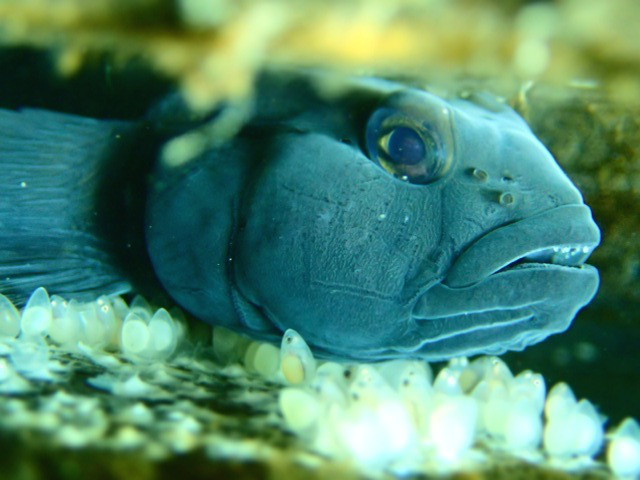

In [5]:
fish

### Segmented

A Jupyter Widget

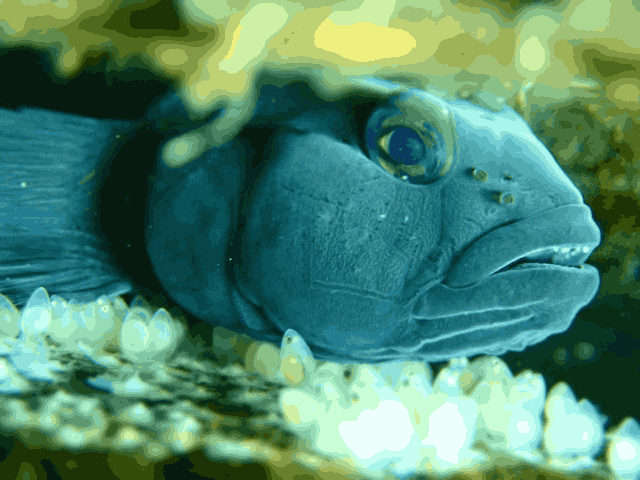

In [6]:
#Fish data with 50 segments
km = KMeans()
labels,centers = km.cluster(fish_data.values,k=50,max_steps=50)
img_clustered = np.array([centers[i] for i in labels])
fish_list_50 = [tuple(np.round(i).astype(int)) for i in img_clustered]
fish_50 = Image.new(fish.mode,fish.size)
fish_50.putdata(fish_list_50)
fish_50

## Within-Cluster Sum of Squares
From the plot below, we can see that the clustering assignments stopped making noticeable improvements after about 10 iterations. We could improve the quality of the clusters, i.e. lower the WCSS, by increasing the number of clusters.

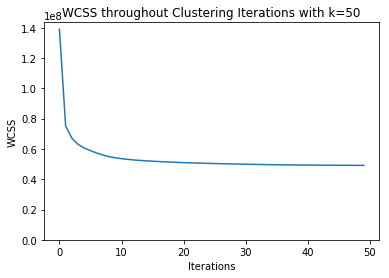

In [8]:
plt.plot(km.wcss_)
plt.ylim(0)
plt.title("WCSS throughout Clustering Iterations with k=50")
plt.ylabel("WCSS")
plt.xlabel("Iterations")
plt.show()